Je commence par les packages Python dont je vais avoir besoin

In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 23.7 MB/s eta 0:00:00


J'importe les librairies Python dont je vais également avoir besoin

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem
import pandas as pd

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300, 300
rdDepictor.SetPreferCoordGen(True)

Ensuite je lis le fichier csv qui m'intéresse grâce à Panda

In [29]:
# URL du fichier choisi
url = "https://raw.githubusercontent.com/PatWalters/practical_cheminformatics_tutorials/main/data/dude_erk2_mk01.csv"

# Lecture du fichier CSV
DataFrame = pd.read_csv(url, sep=",")

# Affichage des premières lignes du DataFrame
print(DataFrame)

      Unnamed: 0                                             SMILES  \
0              0  Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...   
1              1  C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...   
2              2  Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...   
3              3  Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...   
4              4  Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...   
...          ...                                                ...   
4624        4545  CCOc1ccc(cc1[N+](=O)[O-])C(=O)OCCSc2cc(c(c(c2)...   
4625        4546  Cc1cc(cc(c1NC(=O)c2ccccc2)C)SCCOC(=O)c3cc(ccc3...   
4626        4547  CCc1ccc(cc1)O[C@@H](C)c2nnc(n2C)SCC(=O)Nc3c(c4...   
4627        4548  C=CCSc1ccccc1NC(=O)CSc2nnc(n2c3ccccc3)c4ccc(cc...   
4628        4549  CCc1cccc(c1)NC(=O)CSc2nc3c(nn(c3c(=O)n2Cc4cccc...   

             ID  is_active  
0        168691          1  
1         86358          1  
2        575087          1  
3        575065          1  
4 

Ensuite je vais extraire toutes les molécules en SMILES

In [37]:
molecules_smiles = DataFrame["SMILES"]
print(molecules_smiles)

0       Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...
1       C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...
2       Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...
3       Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...
4       Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...
                              ...                        
4624    CCOc1ccc(cc1[N+](=O)[O-])C(=O)OCCSc2cc(c(c(c2)...
4625    Cc1cc(cc(c1NC(=O)c2ccccc2)C)SCCOC(=O)c3cc(ccc3...
4626    CCc1ccc(cc1)O[C@@H](C)c2nnc(n2C)SCC(=O)Nc3c(c4...
4627    C=CCSc1ccccc1NC(=O)CSc2nnc(n2c3ccccc3)c4ccc(cc...
4628    CCc1cccc(c1)NC(=O)CSc2nc3c(nn(c3c(=O)n2Cc4cccc...
Name: SMILES, Length: 4629, dtype: object


J'importe les outils nécessaires pour afficher les molécules et je réutilise la fonction vue dans le tutoriel "SMILES" pour afficher les molécules de mon fichier

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


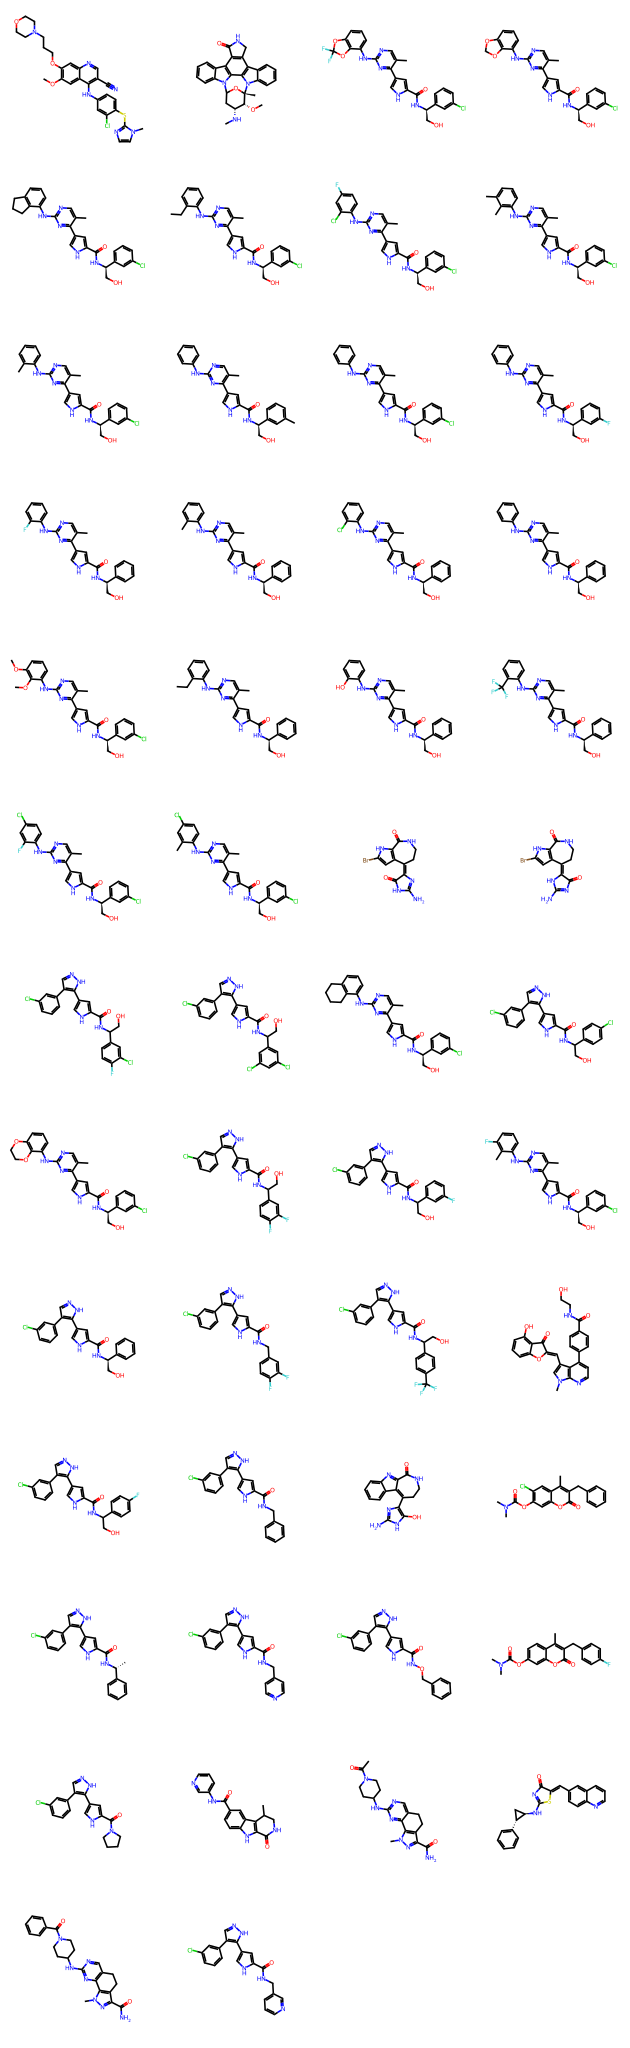

In [39]:
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    name_list = []
    for smiles in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
    return MolsToGridImage(mol_list,legends=name_list,molsPerRow=4)

display_structures(molecules_smiles)